<a href="https://colab.research.google.com/github/Abdelrahman-khaled-22/SkinCa/blob/main/Skinca_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'skin-cancer:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3233855%2F5624756%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240527%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240527T183416Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D58d809ab2451bad697cd1316e4605dd1c440e20023b63e12be2be1cbec831409e055535fc2bb68911f04a69ae9674c9cde8f3f194453dbde10812fbe4c8627cd1f18c4c77f921403d41ebd40f2685b7082d5ba257e93ebad1c4ca6c729f63cfba5db4dbd478b9793179f175b9556241505cd70e9b60cf921ac76e80b3835fee8440c390dff250950c6ebc6712b98930e2542e28a0682ffc2b593e9cb603e7b54c997f6eda76bd8edfedd7fc7032c4358b63de1f478e47819fd011e9e8983c47385bc33f469aefa2282ca587ed0544a8242f8ae4f757ac39dc05d1729c5f5c97499f0165a3733779f6997440a894886ed63ddac22afd656965bc1fafc8cdcb91b'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 405201731 bytes downloaded
Downloaded and uncompressed: skin-cancer
Data source import complete.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2


In [ ]:
np.random.seed(1234)
path='/kaggle/input/skin-cancer/skin caner'
img_list=os.listdir(path)
lables=[i for i in range(len(img_list))]
label_dict=dict()
label_dict['Normal']= 0
label_dict['melanoma']= 1
label_dict['nevus']= 2
label_dict['pigmented benign keratosis']= 3

In [ ]:
data=[]
label=[]
C=0
for cat in img_list:
    C=0
    pic_list=os.path.join(path,cat)
    for img in  os.listdir(pic_list):
        image=os.path.join(pic_list,img)
        if (image == "/kaggle/input/skin-cancer/skin caner/Normal/34.avif"):
            continue
        else:
            image=cv2.imread(image)
            image = cv2.resize(image, (224, 224))
            data.append(image)
            label.append(label_dict[cat])
            C+=1
    print(C)

357
438
462
403


In [ ]:
data=np.array(data)
data.shape

(1660, 224, 224, 3)

In [ ]:
label=np.array(label)
label.shape

(1660,)

In [ ]:
import keras
from keras.datasets import cifar10
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, BatchNormalization, Flatten,Conv2D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB0,EfficientNetB3,vgg19
from sklearn.model_selection import train_test_split

In [ ]:
num_classes = 4
label = keras.utils.to_categorical(label, num_classes)

In [ ]:
model=vgg19.VGG19(include_top=True,weights=None,input_shape=(224,224,3),classes=4)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001),metrics=['accuracy'])

In [ ]:
acc=[]
for i in range(5):
    x_train,x_test, y_train, y_test=train_test_split(data, label, test_size=0.2,random_state = np.random.randint(1,1000, 1)[0])
    x_train,x_valid,y_train,y_valid= train_test_split(x_train, y_train, test_size=0.1,random_state = np.random.randint(1,1000, 1)[0])
    model.fit(x_train,y_train,validation_data=(x_valid,y_valid), epochs=15,batch_size=16,verbose=1)
    acc.append(model.evaluate(x_test,y_test))

Epoch 1/15
75/75 [==============================] - 50s 422ms/step - loss: 1.4065 - accuracy: 0.2686 - val_loss: 1.3549 - val_accuracy: 0.4812
Epoch 2/15
75/75 [==============================] - 22s 299ms/step - loss: 1.3020 - accuracy: 0.3782 - val_loss: 1.2012 - val_accuracy: 0.3383
Epoch 3/15
75/75 [==============================] - 22s 290ms/step - loss: 1.1863 - accuracy: 0.4000 - val_loss: 0.9883 - val_accuracy: 0.5338
Epoch 4/15
75/75 [==============================] - 22s 294ms/step - loss: 0.9342 - accuracy: 0.5891 - val_loss: 0.9765 - val_accuracy: 0.4511
Epoch 5/15
75/75 [==============================] - 21s 286ms/step - loss: 0.8571 - accuracy: 0.6092 - val_loss: 0.7912 - val_accuracy: 0.6241
Epoch 6/15
75/75 [==============================] - 22s 289ms/step - loss: 0.6519 - accuracy: 0.7347 - val_loss: 1.1265 - val_accuracy: 0.5113
Epoch 7/15
75/75 [==============================] - 22s 297ms/step - loss: 0.7133 - accuracy: 0.7029 - val_loss: 0.8611 - val_accuracy: 0.6241

In [ ]:
acc

[[0.6292012929916382, 0.759036123752594],
 [0.6693949699401855, 0.8042168617248535],
 [0.5255533456802368, 0.8554216623306274],
 [0.22411775588989258, 0.9487951993942261],
 [0.16370974481105804, 0.9698795080184937]]

In [ ]:
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)
y_pred

11/11 [==============================] - 2s 144ms/step


array([2, 3, 3, 3, 3, 0, 0, 0, 0, 1, 0, 2, 0, 3, 3, 2, 2, 3, 2, 0, 3, 1,
       0, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 2, 2, 2, 3, 0, 2, 0, 2, 1, 0, 3,
       0, 3, 0, 3, 1, 1, 0, 1, 0, 3, 1, 1, 1, 1, 1, 3, 2, 2, 3, 1, 1, 0,
       3, 2, 0, 0, 3, 0, 0, 0, 3, 3, 3, 2, 0, 1, 3, 3, 2, 1, 3, 3, 3, 3,
       2, 3, 2, 0, 2, 3, 3, 2, 3, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 3, 2, 1,
       0, 0, 1, 3, 2, 2, 3, 2, 3, 1, 1, 3, 3, 2, 3, 0, 3, 3, 3, 3, 2, 2,
       2, 2, 1, 0, 0, 2, 0, 1, 0, 3, 2, 3, 3, 0, 3, 1, 3, 2, 2, 2, 1, 3,
       2, 1, 2, 2, 3, 0, 0, 2, 0, 3, 1, 0, 2, 2, 0, 0, 0, 0, 3, 3, 0, 2,
       1, 0, 1, 1, 0, 0, 2, 3, 3, 0, 3, 0, 2, 2, 2, 3, 3, 1, 3, 0, 0, 0,
       3, 2, 0, 3, 1, 1, 3, 0, 0, 1, 0, 3, 0, 1, 1, 2, 0, 3, 1, 3, 2, 1,
       3, 3, 1, 1, 1, 0, 2, 3, 3, 0, 1, 3, 3, 1, 2, 3, 0, 3, 3, 3, 1, 3,
       1, 3, 1, 1, 2, 1, 0, 1, 0, 2, 2, 3, 0, 0, 1, 1, 0, 1, 3, 1, 2, 2,
       2, 0, 1, 0, 3, 2, 3, 0, 2, 1, 1, 3, 1, 1, 0, 3, 0, 2, 1, 1, 1, 1,
       3, 3, 2, 3, 0, 2, 2, 3, 3, 2, 2, 1, 0, 1, 2,

In [ ]:
y_test=np.argmax(y_test, axis=1)

In [ ]:
from sklearn.metrics import *
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        75
           1       1.00      0.94      0.97        85
           2       0.94      0.95      0.94        78
           3       0.96      0.99      0.97        94

    accuracy                           0.97       332
   macro avg       0.97      0.97      0.97       332
weighted avg       0.97      0.97      0.97       332



In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[75  0  0  0]
 [ 1 80  4  0]
 [ 0  0 74  4]
 [ 0  0  1 93]]


<Axes: >

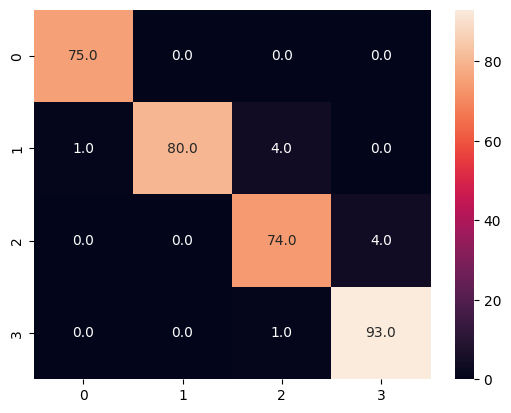

In [ ]:
sns.heatmap(cm,annot=True,fmt='.1f')

In [ ]:
model.save("cancer_detection_using_VGG19.h5")

In [ ]:
from IPython.display import FileLink
FileLink(r'cancer_detection_using_VGG19.h5')

/content/cancer_detection_using_VGG19.h5